In [31]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import random_split
import torch.nn.functional as F
#import torch.optim as optim

import pandas as pd
import seaborn as sns


In [32]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)

testvalset = torchvision.datasets.CIFAR10(root='./data/', train=False,
                                          download=False, transform=transform)

testset, valset = random_split(testvalset, [0.5, 0.5])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

print(len(trainset))
print(len(testset))
print(len(valset))

# print(len(dataset))

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
50000
5000
5000


In [33]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)


cuda:0


In [ ]:

from NNs import init_weights, CNN

model = CNN().to(device)
model.apply(init_weights)

ImportError: cannot import name 'init_weights' from 'NNs' (/data/marci/mjakowsk/EDS4AI/NNs.py)

In [ ]:
#print_output_shape = False


#data_iter = iter(trainset)

#for i in range(3):
    #(data, label) = next(data_iter)
#im = data
#data = data.unsqueeze(0)
#input_shape = data.shape

#if (print_output_shape):
    #print(data.shape)
    #print(model(data))
    #print('\n')


#from torchsummary import summary
#_ = summary(model, ( 3, 32, 32))

#print(model(data).shape)

In [ ]:
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, weight_decay=0.001)
scheduler = StepLR(optimizer, step_size=1, gamma=0.97)


In [ ]:
#epoch_number = 75
epoch_number = 130

from Helper_Functions import calculate_valloss, calculate_accuracy, save_checkpoint


epoch_list = []
loss_list = []

val_accuracy_list = []
val_loss_list = []
epoch_range_list = list(range(epoch_number))


for epoch in range(epoch_number):  # loop over the dataset multiple times
    n_batches = 0
    running_loss = 0.0


    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
       
        outputs = model(inputs)
        #print(outputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        n_batches += 1

    epoch_list.append(epoch+1)
    loss_list.append(running_loss/n_batches)
    
    print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 40:.7f}')
    running_loss = 0.0

    val_accuracy_list.append(calculate_accuracy(model, valloader))
    val_loss_list.append(calculate_valloss(model, criterion, valloader, device))


    if (epoch+1) % 5 == 0:
        save_checkpoint(model, optimizer, epoch+1, loss.item(), ilename=f"checkpoints/checkpoint_{epoch + 1}.pth")
        

    scheduler.step()


print('Finished Training')

ImportError: cannot import name 'calculate_valloss' from 'Helper_Functions' (/data/marci/mjakowsk/EDS4AI/Helper_Functions.py)

In [ ]:
dic = {'losses':loss_list, 'epoch':epoch_list, "batch":minibatch_number_list}
df = pd.DataFrame(data=dic)
#df = df[150:]

p = sns.lineplot(data=df, x=df.index, y='losses')
p.set_xlabel("Epoch")
p.set_ylabel("Avg Cross Entropy Loss")
p.set_title("Training Loss")


NameError: name 'loss_list' is not defined

Text(0.5, 1.0, 'Validation Accuracy per Epoch')

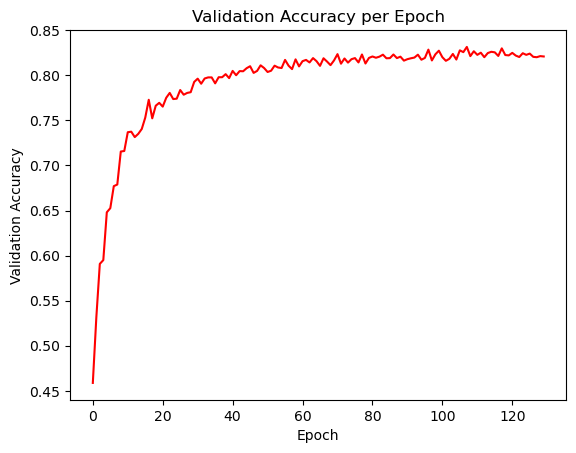

In [ ]:
dic2 = {'Validation Accuracy':val_accuracy_list, 'Epoch':epoch_range_list}
df2 = pd.DataFrame(data=dic2)

p2 = sns.lineplot(data=df2, x='Epoch', y='Validation Accuracy', color='red')
p2.set_title('Validation Accuracy per Epoch')



In [ ]:
test_single_image = False

if (test_single_image):
    data_iter = iter(testset)

    for i in range(40):
        (data, label) = next(data_iter)
    im = data
    data = data.unsqueeze(0)
    soft = nn.Softmax(dim=1)
    imshow(im)
    print(label)

    model_output = model(data)
    prediction = soft(model_output)

    _, ind = (torch.max(prediction, dim=1))
    print(ind)
    print("\n")

#from torchviz import make_dot, make_dot_from_trace
#make_dot(model_output.mean(), params=dict(model.named_parameters()))




In [ ]:

calculate_accuracy(model, testloader)


0.8358

### Code to save Model

In [ ]:
torch.save(model.state_dict(), "model_weights_130_epochs")